In [1]:
import pandas as pd
%load_ext autoreload
%autoreload 2
from ff_energy.ffe.slurm import SlurmJobHandler
from pathlib import Path
import pandas as pd
import jax.numpy as jnp
import itertools as it
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ff_energy.ffe.potential import (
    LJ,
    DE,
)
from ff_energy.ffe.ff import FF
from ff_energy.ffe.constants import FFEPATH, PDB_PATH
from ff_energy.plotting.ffe_plots import plot_energy_MSE, plot_ff_fit
from ff_energy.plotting.plotting import set_style
from ff_energy.plotting.fit_results import residuals_plot, residuals_from_keys
from ff_energy.logs.logging import hide_logs
from ff_energy.ffe.potential import LJ, LJ_bound, DE

hide_logs()
import scienceplots
set_style(no_latex=True)

from ff_energy.ffe.ff_fit import (
    load_ff,
    fit_func,
    fit_repeat,
)

from ff_energy.utils.ffe_utils import pickle_output, read_from_pickle, str2int, PKL_PATH
from ff_energy.utils.json_utils import load_json
from ff_energy.ffe.structure import atom_key_pairs

from ff_energy.utils.ffe_utils import pickle_output, read_from_pickle, str2int, \
    PKL_PATH, get_structures

from sklearn.metrics import mean_squared_error as calc_rmse


0 ('C', 'C')
1 ('C', 'CG331')
2 ('C', 'CL')
3 ('C', 'CLA')
4 ('C', 'H')
5 ('C', 'HGA3')
6 ('C', 'HGP1')
7 ('C', 'HT')
8 ('C', 'OG311')
9 ('C', 'OT')
10 ('C', 'POT')
11 ('CG331', 'CG331')
12 ('CG331', 'CL')
13 ('CG331', 'CLA')
14 ('CG331', 'H')
15 ('CG331', 'HGA3')
16 ('CG331', 'HGP1')
17 ('CG331', 'HT')
18 ('CG331', 'OG311')
19 ('CG331', 'OT')
20 ('CG331', 'POT')
21 ('CL', 'CL')
22 ('CL', 'CLA')
23 ('CL', 'H')
24 ('CL', 'HGA3')
25 ('CL', 'HGP1')
26 ('CL', 'HT')
27 ('CL', 'OG311')
28 ('CL', 'OT')
29 ('CL', 'POT')
30 ('CLA', 'CLA')
31 ('CLA', 'H')
32 ('CLA', 'HGA3')
33 ('CLA', 'HGP1')
34 ('CLA', 'HT')
35 ('CLA', 'OG311')
36 ('CLA', 'OT')
37 ('CLA', 'POT')
38 ('H', 'H')
39 ('H', 'HGA3')
40 ('H', 'HGP1')
41 ('H', 'HT')
42 ('H', 'OG311')
43 ('H', 'OT')
44 ('H', 'POT')
45 ('HGA3', 'HGA3')
46 ('HGA3', 'HGP1')
47 ('HGA3', 'HT')
48 ('HGA3', 'OG311')
49 ('HGA3', 'OT')
50 ('HGA3', 'POT')
51 ('HGP1', 'HGP1')
52 ('HGP1', 'HT')
53 ('HGP1', 'OG311')
54 ('HGP1', 'OT')
55 ('HGP1', 'POT')
56 ('HT', 'HT'

<Figure size 100x100 with 0 Axes>

#  Old FF objects

In [2]:
FFOBJ = pd.read_pickle("/home/boittier/Documents/phd/ff_energy/pickles/ELECppol_water_cluster_lj_fitted.pkl")

In [3]:
FFOBJ.bounds

[(0.1, 5.5), (0.1, 5.5), (0.001, 0.1), (0.001, 0.1)]

In [4]:
FFOBJ.get_best_parm()

array([0.25350672, 1.81346734, 0.1       , 0.09999997])

In [5]:
pd.DataFrame(FFOBJ.opt_results).iloc[34].x

array([0.42993422, 1.82258562, 0.02052867, 0.07544607])

In [6]:
pd.DataFrame(FFOBJ.opt_results).sort_values("fun")

,fun,nit,nfev,status,success,message,x,final_simplex
25,20.399586,692,1187,0,True,Optimization terminated successfully.,"[0.253506724579593, 1.813467335504473, 0.1, 0....","([[0.253506724579593, 1.813467335504473, 0.1, ..."
36,20.399591,261,471,0,True,Optimization terminated successfully.,"[0.25350258673530257, 1.8134743492080188, 0.09...","([[0.25350258673530257, 1.8134743492080188, 0...."
12,20.399591,438,752,0,True,Optimization terminated successfully.,"[0.25324161112429067, 1.8134934395092426, 0.09...","([[0.25324161112429067, 1.8134934395092426, 0...."
49,20.399595,308,547,0,True,Optimization terminated successfully.,"[0.25363893617649846, 1.813455689873822, 0.1, ...","([[0.25363893617649846, 1.813455689873822, 0.1..."
23,20.399599,464,799,0,True,Optimization terminated successfully.,"[0.25402463927503005, 1.813432805365646, 0.099...","([[0.25402463927503005, 1.813432805365646, 0.0..."
21,20.399603,539,907,0,True,Optimization terminated successfully.,"[0.2533589229985447, 1.8134769455244304, 0.099...","([[0.2533589229985447, 1.8134769455244304, 0.0..."
43,20.399614,464,785,0,True,Optimization terminated successfully.,"[0.2530792976019508, 1.8135024373735058, 0.099...","([[0.2530792976019508, 1.8135024373735058, 0.0..."
14,20.399645,449,765,0,True,Optimization terminated successfully.,"[0.25321811752166085, 1.8134834347782833, 0.1,...","([[0.25321811752166085, 1.8134834347782833, 0...."
3,20.399651,317,545,0,True,Optimization terminated successfully.,"[0.2533416839196808, 1.813478867037685, 0.0999...","([[0.2533416839196808, 1.813478867037685, 0.09..."
40,20.401560,501,850,0,True,Optimization terminated successfully.,"[0.2534447092294453, 1.8134778434535788, 0.098...","([[0.2534447092294453, 1.8134778434535788, 0.0..."


In [7]:
# ljpcff_fit = fit_repeat(FFOBJ,
#              2,
#              "test",
#              loss="jax",
#             quiet=False)

(array([ 18.,  40.,  92.,  98., 100.,  69.,  47.,  24.,   9.,   3.]),
 array([ 0.65398026,  4.9591146 ,  9.264249  , 13.569383  , 17.874517  ,
        22.179651  , 26.484785  , 30.789919  , 35.095055  , 39.40019   ,
        43.705322  ], dtype=float32),
 <BarContainer object of 10 artists>)

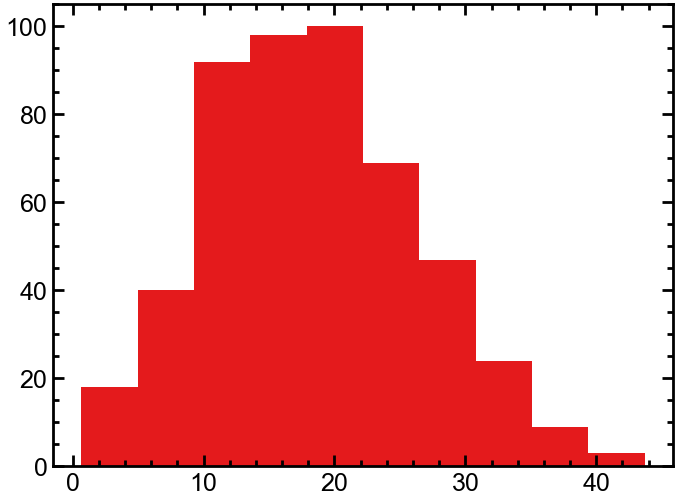

In [8]:
plt.hist(FFOBJ.targets)

# Mike's Data

In [9]:
polE = [-13.711462635646853,
-13.113443990129525,
-12.595535442732256,
-14.095311000002027,
-7.846198418099789,
-12.72244261266701,
-15.185253636471117,
-10.552430608855872,
-16.05838886235921,
-13.43546129222463,
-16.157161381764638,
-14.957260399949945,
-12.250374787929417,
-12.388647565149626,
-12.296129425331827,
-11.34820265559486,
-13.58529778172462,
-10.313607651160595,
-13.382655931830868,
-15.163951361271273,]

#  New structures

In [10]:
data = pd.read_pickle("/home/boittier/Documents/phd/ff_energy/pickles/water_test_pbe0dz_pc.pkl")

In [11]:
data_ = data.data
data_.index = data_.KEY

In [12]:
structure = "water_test"
structs, _ = get_structures(structure,
                            pdbpath=PDB_PATH / structure)

Structure/PDB already already exists, loading from pickle
Structures/PDBs loaded 21 21


In [13]:
data_

,TOTAL,ELEC,VDW,KEY,M_ENERGY,n_monomers,C_ENERGY,intE,C_ENERGY_kcalmol
KEY,,,,,,,,,
test8,12.60002,-85.75712,28.75838,test8,-1527.185935,20,-1527.322128,-85.461648,-958399.217462
test18,10.64131,-78.17967,17.58907,test18,-1527.187973,20,-1527.336863,-93.429267,-958408.463825
test13,10.93537,-79.04137,21.68685,test13,-1527.187075,20,-1527.320634,-83.808636,-958398.279715
test17,11.86569,-62.05376,20.71719,test17,-1527.186904,20,-1527.291967,-65.927379,-958380.291388
test0,11.02944,-76.47372,22.08777,test0,-1527.187283,20,-1527.322163,-84.637925,-958399.239538
test15,9.56544,-72.30831,16.59224,test15,-1527.187259,20,-1527.318020,-82.052976,-958396.639655
test6,10.11763,-93.13948,24.40938,test6,-1527.186791,20,-1527.345572,-99.635761,-958413.928680
test1,10.63645,-85.71770,30.89695,test1,-1527.188251,20,-1527.312131,-77.735360,-958392.944428
test12,8.69738,-67.91695,13.68166,test12,-1527.189014,20,-1527.314804,-78.933784,-958394.621611


In [14]:
dists = {str(s.name)[:-4]: s.distances for s in structs}

struct_data = structs[0]
sig_bound = (0.0025, 5.5)
ep_bound = (0.001, 1.0)
alpha_bound = (1, 8)
beta_bound = (2, 14)
FUNC = LJ
BOUNDS = LJ_bound
elec = "ELEC"
target = "intE"

In [15]:
# data_.loc[names]

In [16]:
ljpcff = FF(
    data_, # pd.DataFrame
    dists, #
    FUNC, #
    BOUNDS, # tuple
    struct_data, 
    elec=elec,
    intE=target,
)
#  set the targets
ljpcff.num_segments = len(data_)
print("Nsegments", ljpcff.num_segments)
ljpcff.set_targets()

Atom types: ['OT', 'HT']
Atom types: ['HT', 'OT']
Atom types: ['HT', 'OT']
Atom type pairs: [('HT', 'HT'), ('HT', 'OT'), ('OT', 'OT')]
setting random parameters
Getting 4 random parameters
bounds:
[(0.1, 5.5), (0.1, 5.5), (0.001, 0.1), (0.001, 0.1)]
Interaction energy:
KEY
test0    -84.637925
test1    -77.735360
test10   -95.064088
test11   -97.757619
test12   -78.933784
test13   -83.808636
test14   -71.344336
test15   -82.052976
test16   -90.358079
test17   -65.927379
test18   -93.429267
test19   -77.414951
test2    -90.019409
test20   -78.403846
test3    -91.516964
test4    -66.347298
test5    -88.904776
test6    -99.635761
test7    -74.328571
test8    -85.461648
test9    -85.440187
Name: intE, dtype: float64
count    21.000000
mean    -83.739184
std       9.593859
min     -99.635761
25%     -90.358079
50%     -84.637925
75%     -77.735360
max     -65.927379
Name: intE, dtype: float64
HT HT
HT OT
OT OT
self.p [2.949710993905509, 3.2379527988263455, 0.47519019731291967, 0.084076191078

In [17]:
a,b,c = ljpcff.eval_jax([0.36058475, 1.74046017, 0.1, 0.1])
a,b,c = ljpcff.eval_jax([ 0.1, 0.1, 0.36058475, 1.74046017,])

In [18]:
# OT     0.00  -0.1521  1.7682 ! ALLOW   WAT
# HT     0.00  -0.0460  0.2245 ! ALLOW WAT

In [19]:
# tip3
a,b,c = ljpcff.eval_jax([ 
        0.2245,
        1.7682, 
        0.0460, 
        0.1521, 
])
# parms = [0.42993422, 1.82258562, 0.02052867, 0.07544607]

a,b,c = ljpcff.eval_jax([0.25350672, 1.81346734, 0.1       , 0.09999997])

# a,b,c = ljpcff.eval_jax(parms)


In [20]:
a

Array([24.734056, 33.682426, 26.878933, 22.659956, 16.10111 , 23.963076,
       27.56388 , 18.890713, 28.435148, 22.700815, 19.725416, 29.593384,
       23.60719 , 28.163837, 26.21153 , 15.524305, 35.687798, 27.206135,
       18.98311 , 31.487423, 25.441103], dtype=float32)

In [21]:
a_,b_,c_ = FFOBJ.eval_jax([0.25350672, 1.81346734, 0.1       , 0.09999997])

In [22]:
ljpcff.data

,TOTAL,ELEC,VDW,KEY,M_ENERGY,n_monomers,C_ENERGY,intE,C_ENERGY_kcalmol,DUMMY
KEY,,,,,,,,,,
test0,11.02944,-76.47372,22.08777,test0,-1527.187283,20,-1527.322163,-84.637925,-958399.239538,0.0
test1,10.63645,-85.71770,30.89695,test1,-1527.188251,20,-1527.312131,-77.735360,-958392.944428,0.0
test10,10.09662,-89.77506,24.00860,test10,-1527.187550,20,-1527.339045,-95.064088,-958409.833043,0.0
test11,9.97533,-79.93098,20.57407,test11,-1527.188313,20,-1527.344101,-97.757619,-958413.005378,0.0
test12,8.69738,-67.91695,13.68166,test12,-1527.189014,20,-1527.314804,-78.933784,-958394.621611,0.0
test13,10.93537,-79.04137,21.68685,test13,-1527.187075,20,-1527.320634,-83.808636,-958398.279715,0.0
test14,10.62310,-71.58025,24.96655,test14,-1527.189420,20,-1527.303115,-71.344336,-958387.286722,0.0
test15,9.56544,-72.30831,16.59224,test15,-1527.187259,20,-1527.318020,-82.052976,-958396.639655,0.0
test16,12.68634,-86.58325,25.73819,test16,-1527.184128,20,-1527.328125,-90.358079,-958402.980158,0.0


(array([2., 0., 1., 4., 4., 4., 3., 1., 1., 1.]),
 array([-17.826645 , -15.245747 , -12.664848 , -10.08395  ,  -7.5030518,
         -4.9221535,  -2.3412552,   0.2396431,   2.8205414,   5.4014397,
          7.982338 ], dtype=float32),
 <BarContainer object of 10 artists>)

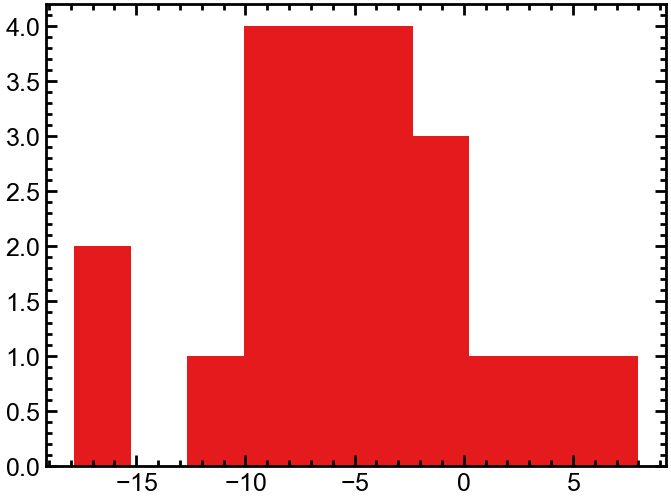

In [23]:
plt.hist(ljpcff.targets)

In [24]:
datacopy = ljpcff.data.copy()
datacopy["fitE"] = a
datacopy["target"] = ljpcff.targets
datacopy

,TOTAL,ELEC,VDW,KEY,M_ENERGY,n_monomers,C_ENERGY,intE,C_ENERGY_kcalmol,DUMMY,fitE,target
KEY,,,,,,,,,,,,
test0,11.02944,-76.47372,22.08777,test0,-1527.187283,20,-1527.322163,-84.637925,-958399.239538,0.0,24.734056,-8.164207
test1,10.63645,-85.71770,30.89695,test1,-1527.188251,20,-1527.312131,-77.735360,-958392.944428,0.0,33.682426,7.982338
test10,10.09662,-89.77506,24.00860,test10,-1527.187550,20,-1527.339045,-95.064088,-958409.833043,0.0,26.878933,-5.289024
test11,9.97533,-79.93098,20.57407,test11,-1527.188313,20,-1527.344101,-97.757619,-958413.005378,0.0,22.659956,-17.826645
test12,8.69738,-67.91695,13.68166,test12,-1527.189014,20,-1527.314804,-78.933784,-958394.621611,0.0,16.101110,-11.016838
test13,10.93537,-79.04137,21.68685,test13,-1527.187075,20,-1527.320634,-83.808636,-958398.279715,0.0,23.963076,-4.767265
test14,10.62310,-71.58025,24.96655,test14,-1527.189420,20,-1527.303115,-71.344336,-958387.286722,0.0,27.563881,0.235916
test15,9.56544,-72.30831,16.59224,test15,-1527.187259,20,-1527.318020,-82.052976,-958396.639655,0.0,18.890713,-9.744667
test16,12.68634,-86.58325,25.73819,test16,-1527.184128,20,-1527.328125,-90.358079,-958402.980158,0.0,28.435148,-3.774826


In [25]:
datacopy = datacopy.loc[ ["test0",
"test1",
"test2",
"test3",
"test4",
"test5",
"test6",
"test7",
"test8",
"test9",
"test10",
"test11",
"test12",
"test13",
"test14",
"test15",
"test16",
"test17",
"test18",
"test19",]]
datacopy["EPOL"] = polE

In [26]:
datacopy

,TOTAL,ELEC,VDW,KEY,M_ENERGY,n_monomers,C_ENERGY,intE,C_ENERGY_kcalmol,DUMMY,fitE,target,EPOL
KEY,,,,,,,,,,,,,
test0,11.02944,-76.47372,22.08777,test0,-1527.187283,20,-1527.322163,-84.637925,-958399.239538,0.0,24.734056,-8.164207,-13.711463
test1,10.63645,-85.71770,30.89695,test1,-1527.188251,20,-1527.312131,-77.735360,-958392.944428,0.0,33.682426,7.982338,-13.113444
test2,10.62982,-86.03509,21.05558,test2,-1527.187648,20,-1527.331104,-90.019409,-958404.850004,0.0,23.607189,-3.984322,-12.595535
test3,10.46860,-83.35005,24.12367,test3,-1527.188524,20,-1527.334367,-91.516964,-958406.897045,0.0,26.211531,-8.166908,-14.095311
test4,11.90133,-61.08977,13.29071,test4,-1527.183458,20,-1527.289190,-66.347298,-958378.548486,0.0,15.524305,-5.257526,-7.846198
test5,10.60922,-87.64687,32.48558,test5,-1527.188095,20,-1527.329776,-88.904776,-958404.016178,0.0,35.687798,-1.257904,-12.722443
test6,10.11763,-93.13948,24.40938,test6,-1527.186791,20,-1527.345572,-99.635761,-958413.928680,0.0,27.206135,-6.496277,-15.185254
test7,11.02849,-65.37872,16.73097,test7,-1527.185562,20,-1527.304014,-74.328571,-958387.850459,0.0,18.983110,-8.949844,-10.552431
test8,12.60002,-85.75712,28.75838,test8,-1527.185935,20,-1527.322128,-85.461648,-958399.217462,0.0,31.487423,0.295471,-16.058389


In [27]:
np.sqrt(calc_rmse(
    ljpcff.data.intE,
    a + ljpcff.data.ELEC
))

30.656322494705577

In [35]:
np.sqrt(calc_rmse(
datacopy.intE,
    datacopy.fitE + datacopy.ELEC + datacopy.EPOL
))

17.696861404603297

In [34]:
np.std(datacopy.intE - (datacopy.fitE + datacopy.ELEC + datacopy.EPOL))

3.563423981372453

In [29]:
np.sqrt(calc_rmse(FFOBJ.data.intE, a_ + FFOBJ.data.ELECppol))

4.516590187375736

In [30]:
# plt.scatter(
#             ljpcff.data.intE,
#             a + ljpcff.data.ELEC, 
#            )
# plt.scatter(FFOBJ.data.intE, a_ + FFOBJ.data.ELECppol,  c="gray", alpha=0.5)

# plt.plot([-120, 0], [-120, 0], c="k")

# plt.xlim(-120, 0)
# plt.ylim(-120, 0)
# plt.gca().set_aspect('equal')

# plt.xlabel("PBE ENERGY [kcal/mol]")
# plt.ylabel("FF ENERGY [kcal/mol]")
# # plt.savefig("water_pc_test.png")

In [31]:
datacopy.ELEC + datacopy.EPOL

KEY
test0     -90.185183
test1     -98.831144
test2     -98.630625
test3     -97.445361
test4     -68.935968
test5    -100.369313
test6    -108.324734
test7     -75.931151
test8    -101.815509
test9     -92.246431
test10   -105.932221
test11    -94.888240
test12    -80.167325
test13    -91.430018
test14    -83.876379
test15    -83.656513
test16   -100.168548
test17    -72.367368
test18    -91.562326
test19    -95.744461
dtype: float64

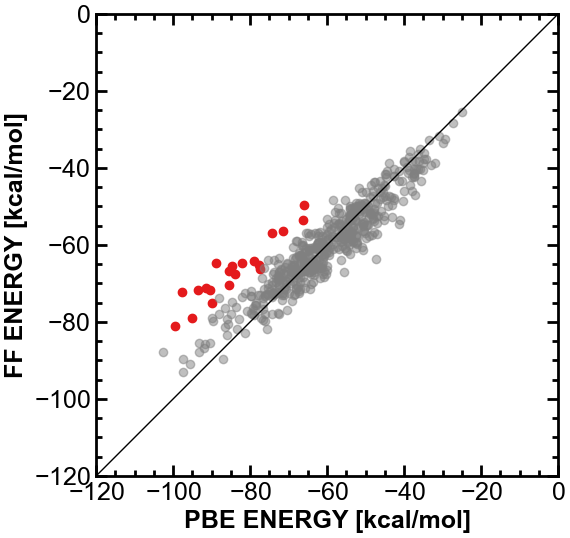

In [32]:
plt.scatter(datacopy.intE,
    datacopy.fitE + datacopy.ELEC + datacopy.EPOL
            )
plt.scatter(FFOBJ.data.intE, a_ + FFOBJ.data.ELECppol, c="gray", alpha=0.5)

plt.plot([-120, 0], [-120, 0], c="k")

plt.xlim(-120, 0)
plt.ylim(-120, 0)
plt.gca().set_aspect('equal')

plt.xlabel("PBE ENERGY [kcal/mol]")
plt.ylabel("FF ENERGY [kcal/mol]")
plt.savefig("water_pc_pol_test.png")